# Capstone Project - Predicting Smartphone Purchase of Multi Category Store


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

# Garbage Collector to free up memory
import gc                         
gc.enable()                       # Activate 

In [2]:
column_name_and_dtype = {'event_type': 'category',
                         'product_id': 'category',
                         'category_id': 'category',
                         'category_code': 'category',
                         'brand': 'category',
                         'user_id': 'category',
                         'user_session': 'category',
                         'views': 'int8',
                         'carts': 'int8',
                         'sales': 'int8',
                        }


In [3]:
%%time
df = pd.read_csv('csv_files/dataset.gz', 
                 compression = 'gzip', 
                 low_memory = True, 
                 dtype = column_name_and_dtype,
                 parse_dates = ['event_time'])


Wall time: 9min 19s


In [7]:
df['category'] = df['category_code'].apply(lambda x: x.split('.')[0])
df['revenue'] = df['price'] * df['sales']

In [39]:
df_category = df.groupby(['category']) \
                .agg(views = ('views', 'sum'),
                     carts = ('carts', 'sum'),
                     sales = ('sales', 'sum'),
                     revenue = ('revenue', 'sum')) \
                .reset_index()

In [40]:
df_category['cart_to_view_ratio (%)'] = (df_category['carts'] / df_category['views'] * 100).round(3)
df_category['conversion rate (%)'] = (df_category['sales'] / df_category['views'] * 100).round(3)
df_category['revenue (%)'] = (df_category['revenue'] / df_category['revenue'].sum() * 100).round(2)
df_category

,category,views,carts,sales,revenue,cart_to_view_ratio (%),conversion rate (%),revenue (%)
0,accessories,535670.0,7027.0,3318.0,1.445401e+05,1.312,0.619,0.03
1,apparel,3471028.0,44648.0,17863.0,1.448203e+06,1.286,0.515,0.33
2,appliances,12068081.0,423048.0,165569.0,3.076484e+07,3.506,1.372,6.91
3,auto,1701645.0,39276.0,16481.0,2.120182e+06,2.308,0.969,0.48
4,computers,6098450.0,140959.0,60522.0,2.516319e+07,2.311,0.992,5.65
5,construction,1355169.0,32956.0,11902.0,1.582978e+06,2.432,0.878,0.36
6,country_yard,30037.0,416.0,126.0,2.754077e+04,1.385,0.419,0.01
7,electronics,36318863.0,2187298.0,910880.0,3.806476e+08,6.022,2.508,85.46
8,furniture,1511051.0,22134.0,9555.0,1.690758e+06,1.465,0.632,0.38
9,kids,1046946.0,19501.0,9607.0,1.209916e+06,1.863,0.918,0.27


In [48]:
business_conversion_rate = df_category['sales'].sum() / df_category['views'].sum() * 100
business_conversion_rate

1.873559331680558

In [42]:
df_category.to_csv('output/category_summary.csv', index = False)

In [43]:
df['product'] = df['category_code'].apply(lambda x: x.split('.')[-1])


In [44]:
df_product = df.groupby(['product_id']) \
               .agg(views = ('views', 'sum'),
                    carts = ('carts', 'sum'),
                    sales = ('sales', 'sum'),
                    price = ('price', 'mean'),
                    category = ('category', 'first'),
                    product = ('product', 'first'),
                    brand = ('brand', 'first')) \
               .reset_index()

In [45]:
df_product['cart_view_ratio'] = df_product['carts'] / df_product['views']
df_product['sale_view_ratio'] = df_product['sales'] / df_product['views']
df_product['name'] = df_product['brand'] + " " + df_product['product'] + " ($" + df_product['price'].round(2).astype('str') + ")"
df_product.set_index('name', inplace = True)
df_product.sample(5)

,product_id,views,carts,sales,price,category,product,brand,cart_view_ratio,sale_view_ratio
name,,,,,,,,,,
candy washer ($345.16),3601593,276.0,1.0,0.0,345.160000,appliances,washer,candy,0.003623,0.0
scooter skates ($75.55),12100943,123.0,1.0,0.0,75.552339,kids,skates,scooter,0.008130,0.0
bravat faucet ($176.15),13900035,8.0,0.0,0.0,176.147500,construction,faucet,bravat,0.000000,0.0
id-cooling cooler ($45.54),30900563,116.0,3.0,0.0,45.538992,computers,cooler,id-cooling,0.025862,0.0
satura cabinet ($334.63),100018476,4.0,0.0,0.0,334.630000,furniture,cabinet,satura,0.000000,0.0


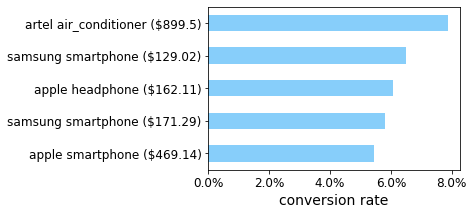

In [47]:
col = 'sale_view_ratio'
df_column = df_product[df_product['sales'] > 200][col].sort_values(ascending = False).head(5).iloc[::-1]
fig, ax = plt.subplots(figsize =[4.5, 3])
df_column.plot(kind = 'barh', fontsize = 12, color = 'lightskyblue')
ax.set_ylabel('')
ax.set_xlabel('conversion rate', fontsize = 14)
xlabels = ['{:,.1f}'.format(x) + '%' for x in ax.get_xticks()*100]
ax.set_xticklabels(xlabels)
fig.savefig('output/product_highest_conversion_rate.png', transparent=True, bbox_inches='tight', dpi=300)

48211

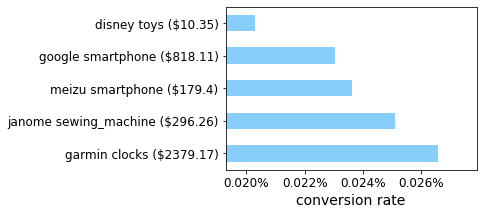

In [46]:
display(df_product[df_product['sale_view_ratio'] == 0].shape[0])

col = 'sale_view_ratio'
df_column = df_product[df_product[col] > 0][col].sort_values(ascending = True).head(5).iloc[::-1]
fig, ax = plt.subplots(figsize =[4.5, 3])
df_column.plot(kind = 'barh', fontsize = 12, xlim = [df_column.min()*0.95, df_column.max()*1.05], color = 'lightskyblue')
ax.set_ylabel('')
ax.set_xlabel('conversion rate', fontsize = 14)
xlabels = ['{:,.3f}'.format(x) + '%' for x in ax.get_xticks()*100]
ax.set_xticklabels(xlabels)
fig.savefig('output/product_lowest_conversion_rate.png', transparent=True, bbox_inches='tight', dpi=300)


In [4]:
#df_category = pd.read_csv('output/category_summary.csv')

In [5]:
df_category

,category,views,carts,sales,revenue,cart_to_view_ratio (%),conversion rate (%),revenue (%)
0,accessories,535670,7027,3318,1.445401e+05,1.312,0.619,0.03
1,apparel,3471028,44648,17863,1.448203e+06,1.286,0.515,0.33
2,appliances,12068081,423048,165569,3.076484e+07,3.506,1.372,6.91
3,auto,1701645,39276,16481,2.120182e+06,2.308,0.969,0.48
4,computers,6098450,140959,60522,2.516319e+07,2.311,0.992,5.65
5,construction,1355169,32956,11902,1.582978e+06,2.432,0.878,0.36
6,country_yard,30037,416,126,2.754077e+04,1.385,0.419,0.01
7,electronics,36318863,2187298,910880,3.806476e+08,6.022,2.508,85.46
8,furniture,1511051,22134,9555,1.690758e+06,1.465,0.632,0.38
9,kids,1046946,19501,9607,1.209916e+06,1.863,0.918,0.27


In [6]:
df_category.set_index('category', inplace = True)


,views,carts,sales,revenue,cart_to_view_ratio (%),conversion rate (%),revenue (%)
category,,,,,,,
accessories,535670,7027,3318,1.445401e+05,1.312,0.619,0.03
apparel,3471028,44648,17863,1.448203e+06,1.286,0.515,0.33
appliances,12068081,423048,165569,3.076484e+07,3.506,1.372,6.91
auto,1701645,39276,16481,2.120182e+06,2.308,0.969,0.48
computers,6098450,140959,60522,2.516319e+07,2.311,0.992,5.65
construction,1355169,32956,11902,1.582978e+06,2.432,0.878,0.36
country_yard,30037,416,126,2.754077e+04,1.385,0.419,0.01
electronics,36318863,2187298,910880,3.806476e+08,6.022,2.508,85.46
furniture,1511051,22134,9555,1.690758e+06,1.465,0.632,0.38


In [16]:
df_category.loc['accessories', 'industry rate(%)'] = 2.16
df_category.loc['apparel', 'industry rate(%)'] = 2.44
df_category.loc['appliances', 'industry rate(%)'] = 2.48
df_category.loc['auto', 'industry rate(%)'] = 1.55
df_category.loc['electronics', 'industry rate(%)'] = 2.23
df_category.loc['kids', 'industry rate(%)'] = 0.99
df_category.loc['medicine', 'industry rate(%)'] = 3.62
df_category.loc['sport', 'industry rate(%)'] = 1.75
df_category.reset_index(inplace = True)

In [17]:
df_category.columns

Index(['category', 'views', 'carts', 'sales', 'revenue',
       'cart_to_view_ratio (%)', 'conversion rate (%)', 'revenue (%)',
       'industry rate(%)'],
      dtype='object')

In [18]:
df_category

,category,views,carts,sales,revenue,cart_to_view_ratio (%),conversion rate (%),revenue (%),industry rate(%)
0,accessories,535670,7027,3318,1.445401e+05,1.312,0.619,0.03,2.16
1,apparel,3471028,44648,17863,1.448203e+06,1.286,0.515,0.33,2.44
2,appliances,12068081,423048,165569,3.076484e+07,3.506,1.372,6.91,2.48
3,auto,1701645,39276,16481,2.120182e+06,2.308,0.969,0.48,1.55
4,computers,6098450,140959,60522,2.516319e+07,2.311,0.992,5.65,NaN
5,construction,1355169,32956,11902,1.582978e+06,2.432,0.878,0.36,NaN
6,country_yard,30037,416,126,2.754077e+04,1.385,0.419,0.01,NaN
7,electronics,36318863,2187298,910880,3.806476e+08,6.022,2.508,85.46,2.23
8,furniture,1511051,22134,9555,1.690758e+06,1.465,0.632,0.38,NaN
9,kids,1046946,19501,9607,1.209916e+06,1.863,0.918,0.27,0.99
